# ***Setup***

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math
from sklearn.model_selection import train_test_split
import pandas as pd
import platform
import plotly.express as px
import plotly.graph_objects as go
import math
import pydot
import graphviz
from IPython.display import Image

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.11.7
Tensorflow version: 2.14.0


In [3]:
sns.set(style='white', context='notebook', palette='deep')

# ***Prepare the data***

In [4]:
#number of digits
num_classes = 10

#Load the dataset MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# # Normalize data - scale images to the [0, 1] range
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)

# # convert class vectors to binary class matrices
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
# train = pd.read_csv('/content/train.csv')

In [6]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# ***Split training and valdiation set***

In [7]:
# Set the random seed
random_seed = 2

In [8]:
# Split the train and the validation set for the fitting
train_images, X_val, train_labels, Y_val = train_test_split(train_images, train_labels, test_size = 0.1, random_state=random_seed)

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_images)

# ***Create the model***

In [10]:
num_classes = 10

model = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'Same'),
      tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'Same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'Same'),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'Same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(num_classes, activation="softmax"),
  ])

# print model layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

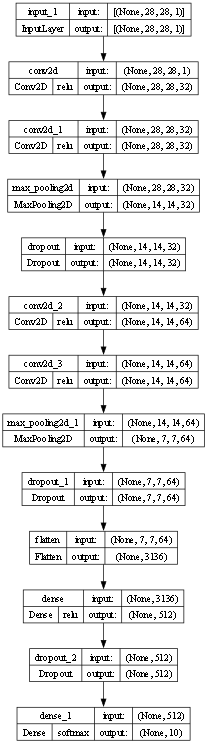

In [11]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_activations=True,
    to_file="model.png",
    expand_nested=True,
    dpi=50,
)

In [12]:
metrics = [tf.keras.metrics.CategoricalAccuracy(name='accuracy')]

In [13]:
# Import necessary modules
import socket
import pickle
import rdflib
from rdflib import *
import plotly.graph_objects as go
from rdflib import URIRef, Graph, Namespace
from rdflib.plugins.parsers.notation3 import N3Parser
from socket import SHUT_RDWR

a = 10

# Create a socket object and connect to the hostname and port number specified
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((socket.gethostname(),1024))

# Enter an infinite loop to receive data
while True:
	# Initialize variables
	complete_info = b''
	rec_msg = True

	# Receive data in chunks of 16 bytes until complete data is received
	while True:
		mymsg = s.recv(16)

		# Check if the message length has been received
		if rec_msg:
			print(f"The length of message = {mymsg[:a]}")
			x = int(mymsg[:a])
			rec_msg = False

		complete_info += mymsg

		# Check if the complete data has been received
		if len(complete_info)-a == x:
			print("Recieved the complete info")
			print(complete_info[:a])

			# Unpickle the received data and store in variable m
			m = pickle.loads(complete_info[a:])
			print(m)

			rec_msg = False
			complete_info = m #b''
			break

	# Print complete_info
	print("=======")
	print(complete_info)

	# Break out of the infinite loop
	break

# Close the socket connection
s.close()

# Set variable formuladict equal to complete_info
accuracy = complete_info

The length of message = b'20        '
Recieved the complete info
b'20        '
['90']
['90']


In [14]:
accuracy

['90']

# ***Train the model***

In [15]:
BATCH_SIZE = 32
EPOCHS = 500
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=metrics)

In [16]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                               patience=10,
                                                               verbose=1,
                                                               factor=0.9,
                                                               cooldown = 1)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True,
    )

In [17]:
history = model.fit(datagen.flow(train_images,
                    train_labels, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    shuffle=True,
                   # use_multiprocessing=True,
                    validation_data=datagen.flow(X_val, Y_val, batch_size=BATCH_SIZE),
                    callbacks = [learning_rate_reduction,
                    early_stopping
                                 ]
                   )

Epoch 1/500
 225/1688 [==>...........................] - ETA: 1:46 - loss: 2.3013 - accuracy: 0.1065

KeyboardInterrupt: 

# ***Results Visualization***


In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoc")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()
plt.savefig('Accuracy.pdf', dpi=600)

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc=(1.03, 0.85))
plt.show()
plt.savefig('Loss.pdf', dpi=600)

In [ ]:
colors=["darkred", "darkgreen", "k"]

def plot_metrics(history):
  metrics = ['prc', 'auc', 'loss']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[1], linestyle="-", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
plot_metrics(history)

# ***Evaluate the trained model***

In [ ]:
result = model.evaluate(test_images, test_labels, verbose="2")
print("loss: %.2f%%"%(result[0]*100))
print("accuracy: %.2f%%"%(result[1]*100))

In [ ]:
if int(accuracy) > result[1]*100:
    print("Try again")

In [ ]:
model.save('model.h5')
#del model  # deletes the existing model

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='k', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('Val.png', dpi=600)

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=1, cmap="Greens", linecolor="gray", fmt= '.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('Confusion.png', dpi=600)